# **Práctica 5: Métricas de distancia (datos estandarizados)**

Nombre: Castillo Montes Pamela

Número de cuenta: 317165935

Email: pamela.castillo.montes@gmail.com

**Objetivo.** Obtener las matrices de distancia (Euclidiana, Chebyshev, Manhattan, Minkowski) a partir de una matriz de datos.


**Fuente de datos:**

Archivo: WDBCOriginal

* IDNumber: Identificador empezando por "P-", seguido de números asociado a cada paciente
* Diagnosis: Donde M(Maligno) y B(Benigno)
* Radius
* Texture
* Perimeter
* Area
* Smoothness
* Compactness
* Concavitiy
* ConcavePoint
* Symmetry
* FractalDimension

#### **1) Importar las bibliotecas necesarias**


In [1]:
import pandas as pd                         # Para la manipulación y análisis de datos
import numpy as np                          # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt             # Para generar gráficas a partir de los datos
from scipy.spatial.distance import cdist    # Para el cálculo de distancias
from scipy.spatial import distance

#### **2) Importar los datos**

In [2]:
Datos = pd.read_csv("Datos/WDBCOriginal.csv") #Considerando que existe un encabezado
Datos

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [3]:
Datos.info() #Caracteristicas de la información guardada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDNumber          569 non-null    object 
 1   Diagnosis         569 non-null    object 
 2   Radius            569 non-null    float64
 3   Texture           569 non-null    float64
 4   Perimeter         569 non-null    float64
 5   Area              569 non-null    float64
 6   Smoothness        569 non-null    float64
 7   Compactness       569 non-null    float64
 8   Concavity         569 non-null    float64
 9   ConcavePoints     569 non-null    float64
 10  Symmetry          569 non-null    float64
 11  FractalDimension  569 non-null    float64
dtypes: float64(10), object(2)
memory usage: 53.5+ KB


Podemos observar que tenemos cadenas por lo que procedemos a eliminar dichas columnas para la estandarización

In [4]:
Datos = Datos.drop(columns=['IDNumber','Diagnosis'])

Y generamos el mapa de calor con los nuevos datos obtenidos

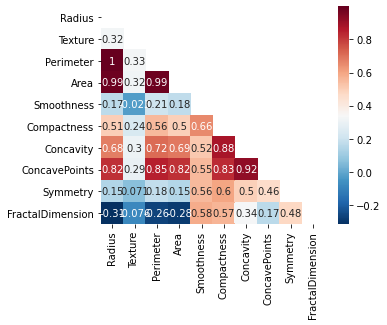

In [6]:
import seaborn as sea 
plt.figure(figsize=(5,4))
MapaCalor=np.triu(Datos.corr())
sea.heatmap(Datos.corr(),cmap='RdBu_r', annot=True, mask=MapaCalor)
plt.show()

**Estandarización de datos**

En los algoritmos basados en distancias es fundamental escalar o normalizar los datos para que cada una de las variables contribuyan por igual en el análisis.

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
estandarizar = StandardScaler()                               
MEstandarizada = estandarizar.fit_transform(Datos)            

In [8]:
pd.DataFrame(MEstandarizada) 

,0,1,2,3,4,5,6,7,8,9
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


#### **3) Matrices de distancia**

**a) Matriz de distancias: Euclidiana**

In [9]:
DstEuclidiana = cdist(MEstandarizada, MEstandarizada, metric='euclidean')
MEuclidiana = pd.DataFrame(DstEuclidiana)

In [10]:
print(MEuclidiana)
#MEuclidiana 

           0         1         2          3         4         5         6    \
0     0.000000  7.088910  4.795874   5.250155  5.214886  4.614290  6.442305   
1     7.088910  0.000000  3.405940   9.883573  2.398472  6.128028  1.617756   
2     4.795874  3.405940  0.000000   7.692264  2.175050  4.758819  2.631164   
3     5.250155  9.883573  7.692264   0.000000  8.740606  4.606783  8.766836   
4     5.214886  2.398472  2.175050   8.740606  0.000000  5.212358  2.273124   
..         ...       ...       ...        ...       ...       ...       ...   
564   6.170932  3.561816  2.047398   9.239833  2.454937  6.230055  3.254004   
565   7.330945  2.862911  2.715544   9.436503  3.410951  6.231692  2.306588   
566   8.139789  3.299199  4.265876   9.495713  4.465735  5.945304  2.391051   
567   4.793285  7.122026  4.087677   6.780535  5.801467  6.476343  6.347867   
568  11.026136  7.033761  8.566715  11.206199  8.349087  7.792580  6.435405   

          7         8         9    ...       559   

In [11]:
print(MEuclidiana.round(3))

        0      1      2       3      4      5      6      7      8      9    \
0     0.000  7.089  4.796   5.250  5.215  4.614  6.442  5.295  4.532  4.852   
1     7.089  0.000  3.406   9.884  2.398  6.128  1.618  5.378  6.315  7.049   
2     4.796  3.406  0.000   7.692  2.175  4.759  2.631  4.292  4.266  5.165   
3     5.250  9.884  7.692   0.000  8.741  4.607  8.767  5.144  4.157  3.694   
4     5.215  2.398  2.175   8.741  0.000  5.212  2.273  5.046  5.441  6.159   
..      ...    ...    ...     ...    ...    ...    ...    ...    ...    ...   
564   6.171  3.562  2.047   9.240  2.455  6.230  3.254  5.896  5.938  6.591   
565   7.331  2.863  2.716   9.437  3.411  6.232  2.307  5.283  5.771  6.349   
566   8.140  3.299  4.266   9.496  4.466  5.945  2.391  4.851  5.771  6.064   
567   4.793  7.122  4.088   6.781  5.801  6.476  6.348  6.114  5.175  5.286   
568  11.026  7.034  8.567  11.206  8.349  7.793  6.435  7.003  8.127  8.206   

     ...    559    560     561    562     563    56

Matriz de distancias de una parte del total de objetos

In [12]:
DstEuclidiana = cdist(MEstandarizada[0:10], MEstandarizada[0:10], metric='euclidean')
MEuclidiana = pd.DataFrame(DstEuclidiana)
print(MEuclidiana) 

          0         1         2         3         4         5         6  \
0  0.000000  7.088910  4.795874  5.250155  5.214886  4.614290  6.442305   
1  7.088910  0.000000  3.405940  9.883573  2.398472  6.128028  1.617756   
2  4.795874  3.405940  0.000000  7.692264  2.175050  4.758819  2.631164   
3  5.250155  9.883573  7.692264  0.000000  8.740606  4.606783  8.766836   
4  5.214886  2.398472  2.175050  8.740606  0.000000  5.212358  2.273124   
5  4.614290  6.128028  4.758819  4.606783  5.212358  0.000000  4.902558   
6  6.442305  1.617756  2.631164  8.766836  2.273124  4.902558  0.000000   
7  5.295066  5.377775  4.291535  5.144048  5.045538  1.816667  4.147147   
8  4.531865  6.314865  4.265551  4.157474  5.441371  1.885945  4.996583   
9  4.851761  7.048714  5.165418  3.694479  6.159409  2.748535  5.729745   

          7         8         9  
0  5.295066  4.531865  4.851761  
1  5.377775  6.314865  7.048714  
2  4.291535  4.265551  5.165418  
3  5.144048  4.157474  3.694479  
4  5

Distancia entre dos objetos

In [13]:
Objeto1 = MEstandarizada[0]
Objeto2 = MEstandarizada[1]
dstEuclidiana = distance.euclidean(Objeto1,Objeto2)
dstEuclidiana 

7.08891001029988

**b) Matriz de distancias: Chebyshev**

In [14]:
DstChebyshev = cdist(MEstandarizada, MEstandarizada, metric='chebyshev')
MChebyshev = pd.DataFrame(DstChebyshev)

In [15]:
print(MChebyshev)

          0         1         2         3         4         5         6    \
0    0.000000  3.770586  2.653755  2.655172  2.818197  2.039179  3.195219   
1    3.770586  0.000000  1.769173  5.779572  1.394857  3.064384  0.813413   
2    2.653755  1.769173  0.000000  5.308927  1.608003  2.288013  1.390296   
3    2.655172  5.779572  5.308927  0.000000  5.473369  3.020914  5.673251   
4    2.818197  1.394857  1.608003  5.473369  0.000000  2.452455  1.312466   
..        ...       ...       ...       ...       ...       ...       ...   
564  3.186774  1.971130  1.252274  5.841946  1.873289  2.849506  1.674029   
565  4.158469  2.438766  1.628947  5.969531  3.236950  2.948616  1.924485   
566  4.118909  2.399206  1.931453  5.806506  3.197390  3.077905  1.884924   
567  4.409792  3.759215  2.219218  3.867224  3.488274  3.171792  3.183849   
568  4.680551  3.638222  4.054295  6.395638  3.590962  5.349506  2.988949   

          7         8         9    ...       559       560       561  \
0  

Matriz de distancias de una parte del total de objetos

In [16]:
DstChebyshev = cdist(MEstandarizada[0:10], MEstandarizada[0:10], metric='chebyshev')
MChebyshev = pd.DataFrame(DstChebyshev)
print(MChebyshev)

          0         1         2         3         4         5         6  \
0  0.000000  3.770586  2.653755  2.655172  2.818197  2.039179  3.195219   
1  3.770586  0.000000  1.769173  5.779572  1.394857  3.064384  0.813413   
2  2.653755  1.769173  0.000000  5.308927  1.608003  2.288013  1.390296   
3  2.655172  5.779572  5.308927  0.000000  5.473369  3.020914  5.673251   
4  2.818197  1.394857  1.608003  5.473369  0.000000  2.452455  1.312466   
5  2.039179  3.064384  2.288013  3.020914  2.452455  0.000000  2.652337   
6  3.195219  0.813413  1.390296  5.673251  1.312466  2.652337  0.000000   
7  2.591848  2.529006  2.058361  3.250566  2.222803  1.193785  2.422685   
8  2.662165  3.028801  1.970470  3.338458  2.210437  1.424165  2.334794   
9  3.178774  3.651748  3.181104  2.127824  3.345546  1.940774  3.545428   

          7         8         9  
0  2.591848  2.662165  3.178774  
1  2.529006  3.028801  3.651748  
2  2.058361  1.970470  3.181104  
3  3.250566  3.338458  2.127824  
4  2

Distancia entre dos objetos

In [18]:
Objeto1 = MEstandarizada[0]
Objeto2 = MEstandarizada[1]
dstChebyshev = distance.chebyshev(Objeto1,Objeto2)
dstChebyshev

3.7705863435627216

**c) Matriz de distancias: Manhattan**

In [19]:
DstManhattan = cdist(MEstandarizada, MEstandarizada, metric='cityblock')
MManhattan = pd.DataFrame(DstManhattan)

In [20]:
print(MManhattan)

           0          1          2          3          4          5    \
0     0.000000  19.960402  12.456494  14.761766  14.386631  13.738927   
1    19.960402   0.000000   9.123546  27.647273   5.776913  17.000477   
2    12.456494   9.123546   0.000000  20.099684   5.161210  12.916073   
3    14.761766  27.647273  20.099684   0.000000  23.669871  11.610203   
4    14.386631   5.776913   5.161210  23.669871   0.000000  14.276762   
..         ...        ...        ...        ...        ...        ...   
564  16.184127   8.861501   5.661976  24.457560   6.257927  18.378786   
565  19.597254   6.058711   7.140760  26.069397   5.827566  17.515356   
566  22.459463   7.682935  12.710774  26.134687  12.076285  16.702619   
567   8.731406  18.760276  10.728167  18.839038  14.760685  19.079466   
568  34.148303  18.949363  24.399613  29.665580  23.767960  21.747286   

           6          7          8          9    ...        559        560  \
0    16.975639  14.624429  12.885631  13.0288

Matriz de distancias de una parte del total de objetos

In [21]:
DstManhattan = cdist(MEstandarizada[0:10], MEstandarizada[0:10], metric='cityblock')
MManhattan = pd.DataFrame(DstManhattan)
print(MManhattan)

           0          1          2          3          4          5  \
0   0.000000  19.960402  12.456494  14.761766  14.386631  13.738927   
1  19.960402   0.000000   9.123546  27.647273   5.776913  17.000477   
2  12.456494   9.123546   0.000000  20.099684   5.161210  12.916073   
3  14.761766  27.647273  20.099684   0.000000  23.669871  11.610203   
4  14.386631   5.776913   5.161210  23.669871   0.000000  14.276762   
5  13.738927  17.000477  12.916073  11.610203  14.276762   0.000000   
6  16.975639   4.408377   7.448497  23.370330   6.222934  13.752097   
7  14.624429  14.887134  11.542140  13.501964  15.290400   4.865802   
8  12.885631  18.706094  11.644391   9.611375  15.588125   4.336713   
9  13.028898  20.259714  13.611883   9.090972  17.255777   6.069308   

           6          7          8          9  
0  16.975639  14.624429  12.885631  13.028898  
1   4.408377  14.887134  18.706094  20.259714  
2   7.448497  11.542140  11.644391  13.611883  
3  23.370330  13.501964   

Distancia entre dos objetos

In [22]:
Objeto1 = MEstandarizada[0]
Objeto2 = MEstandarizada[1]
dstManhattan = distance.cityblock(Objeto1,Objeto2)
dstManhattan

19.960401628448203

**d) Matriz de distancias: Minkowski**

In [23]:
DstMinkowski = cdist(MEstandarizada, MEstandarizada, metric='minkowski', p=1.5)
MMinkowski = pd.DataFrame(DstMinkowski)

In [24]:
print(MMinkowski)

           0          1          2          3          4          5    \
0     0.000000   9.882039   6.445210   7.330588   7.175048   6.595316   
1     9.882039   0.000000   4.656765  13.713921   3.166844   8.501628   
2     6.445210   4.656765   0.000000  10.362426   2.812831   6.568589   
3     7.330588  13.713921  10.362426   0.000000  12.010220   6.115724   
4     7.175048   3.166844   2.812831  12.010220   0.000000   7.186424   
..         ...        ...        ...        ...        ...        ...   
564   8.350730   4.717975   2.824643  12.586517   3.236071   8.842731   
565   9.989640   3.506345   3.690617  13.026342   3.828520   8.707076   
566  11.296910   4.268048   6.088234  13.038363   6.061496   8.247774   
567   5.551356   9.746503   5.535553   9.407928   7.800899   9.202636   
568  16.016982   9.617795  12.045848  15.211356  11.761722  10.730699   

           6         7          8          9    ...        559        560  \
0     8.831132  7.342520   6.334904   6.624968

Matriz de distancias de una parte del total de objetos

In [25]:
DstMinkowski = cdist(MEstandarizada[0:10], MEstandarizada[0:10], metric='minkowski', p=1.5)
MMinkowski = pd.DataFrame(DstMinkowski)
print(MMinkowski)

          0          1          2          3          4         5          6  \
0  0.000000   9.882039   6.445210   7.330588   7.175048  6.595316   8.831132   
1  9.882039   0.000000   4.656765  13.713921   3.166844  8.501628   2.232895   
2  6.445210   4.656765   0.000000  10.362426   2.812831  6.568589   3.668741   
3  7.330588  13.713921  10.362426   0.000000  12.010220  6.115724  11.923885   
4  7.175048   3.166844   2.812831  12.010220   0.000000  7.186424   3.131041   
5  6.595316   8.501628   6.568589   6.115724   7.186424  0.000000   6.820977   
6  8.831132   2.232895   3.668741  11.923885   3.131041  6.820977   0.000000   
7  7.342520   7.482176   5.907521   6.954470   7.259541  2.464669   5.704988   
8  6.334904   8.997149   5.892008   5.262399   7.683148  2.396073   7.040192   
9  6.624968   9.915495   7.000694   4.861496   8.573843  3.503121   7.927489   

          7         8         9  
0  7.342520  6.334904  6.624968  
1  7.482176  8.997149  9.915495  
2  5.907521  5.89

Distancia entre dos objetos

In [26]:
Objeto1 = MEstandarizada[0]
Objeto2 = MEstandarizada[1]
dstMinkowski = distance.minkowski(Objeto1,Objeto2, p=1.5)
dstMinkowski

9.88203919107356